In [39]:
import svgwrite
import random
import uuid
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

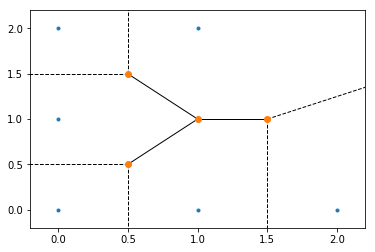

In [43]:
%matplotlib inline
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 2],
                   [2, 0]])
vor = Voronoi(points)

# 
import matplotlib.pyplot as plt
voronoi_plot_2d(vor)
plt.show()

In [ ]:
vor.vertices

In [37]:
vor.regions

[[-1, 0],
 [-1, 1],
 [1, -1, 0],
 [-1, 2, 3],
 [-1, 1, 2],
 [2, 3, 0, 1],
 [-1, 3],
 [],
 [3, -1, 0]]

In [38]:
vor.ridge_vertices

[[-1, 0],
 [-1, 0],
 [-1, 1],
 [-1, 1],
 [0, 1],
 [-1, 2],
 [2, 3],
 [-1, 3],
 [1, 2],
 [0, 3],
 [-1, 3]]

In [55]:
class Point():
    def __init__(self,x,y):
        """Represents a fixed coordinate point on the map"""
        self.x = x
        self.y = y
        
class Line():
    def __init__(self,start_point,endpoint):
        """Represents a line defined between two points"""
        self.start = start_point
        self.end = end_point

class Canvas():
    def __init__(self,canvas_size,border_size):
        """Container for all of the map elements"""
        self.canvas_size = canvas_size
        self.border_size = border_size
        self.points = {}
        self.edges = {}
        
    def generate_hex(self):
        """Generates a unique hex id"""
        _ID = uuid.uuid4().hex
        if _ID in self.points.keys() or _ID in self.edges.keys():
            _ID = self.generate_hex()
        return _ID
        
    def add_point(self,point):
        """Add a point to the canvas"""
        _ID = self.generate_hex()
        self.points[_ID] = point
        
    def generate_points(self,num_points):
        """Randomly generates a set number of points within the canvas"""
        for _ in range(num_points):
            point_width = random.randint(0,self.canvas_size['width']*100)/100
            point_height = random.randint(0,self.canvas_size['height']*100)/100
            self.add_point(Point(point_width,point_height))
            
    def voronoi(self,replace_edges=True):
        """Uses fortune's algorithm to create voronoi diagram"""
        

    def to_svg(self,filename):
        dwg = svgwrite.Drawing(filename, profile='full')

        shapes = dwg.add(dwg.g(id='shapes', fill='white'))
        
        # Draw border
        shapes.add(dwg.rect(insert=(self.border_size['width']*svgwrite.mm,
                                    self.border_size['height']*svgwrite.mm), 
                            size=(self.canvas_size['width']*svgwrite.mm, 
                                  self.canvas_size['height']*svgwrite.mm),
                            stroke='black'))
        
        # Draw points
        for _ID, point in self.points.items():
            shapes.add(dwg.circle(center=((self.border_size['width']+point.x)*svgwrite.mm,
                                          (self.border_size['height']+point.y)*svgwrite.mm),
                                  stroke='black'))
            
        for edge in self.edges:
            shapes.add(dwg.line(start=((self.border_size['width']+edge.start.x)*svgwrite.mm,
                                       (self.border_size['height']+edge.start.y)*svgwrite.mm),
                                end=((self.border_size['width']+edge.end.x)*svgwrite.mm,
                                     (self.border_size['height']+edge.end.y)*svgwrite.mm),
                                stroke='black'))
        dwg.save()
        

canvas_size = {
    'height':200,
    'width':300
}

border_size = {
    'height':10,
    'width':10
}

num_points = 20

canvas = Canvas(canvas_size,border_size)

canvas.generate_points(num_points)

canvas.voronoi()

canvas.to_svg('test.svg')

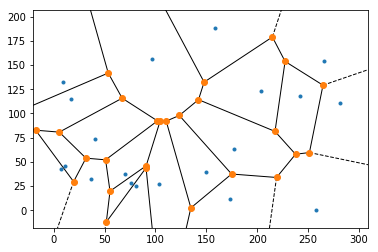

In [56]:
points = np.array([[point.x,point.y] for _,point in canvas.points.items()])

vor = Voronoi(points)

voronoi_plot_2d(vor)
plt.show()

# To Do

* Use lloyd relaxation on points
* Create polgons from Voronoi algorithm
* Create classes for lines
* With collection of lines per polygon can use shapely to find centroid